# Minor project 
## Submitted by:
## Paras
### https://github.com/paras3849

### Objective

#### Our main objective is to identify which features are most helpful in predicting malignant or benign cancer from the available Breast Cancer Data set and compare different classification algorithms to get better performance measures.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

-  ID number

-  Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

-  radius (mean of distances from center to points on the perimeter)

-  texture (standard deviation of gray-scale values)

-  perimeter

-  area

-  smoothness (local variation in radius lengths)

-  compactness (perimeter^2 / area - 1.0)

-  concavity (severity of concave portions of the contour)

-  concave points (number of concave portions of the contour)

-  symmetry

-  fractal dimension ("coastline approximation" - 1)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

## Data Loading

In [3]:
df=pd.read_csv("D:\Project Ekeeda\BreastCancer.csv")

## Initial Analysis

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Null Value Analysis

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.shape

(569, 33)

In [9]:
df=df.dropna(axis=1)

In [10]:
df.shape

(569, 32)

## Exploratory Data Aanalysis

### Data Distribution

In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Different Types of features
There are mainly two types of featuers.
 1. Numerical Features.
 2. Categorical Features.

In [12]:
# Create a list to store all numerical variable
numerical_feature = [feature for feature in df.columns if df[feature].dtypes not in ['O', 'object'] ]

print("Number of Numerical Variable ", len(numerical_feature))

df[numerical_feature].head()

Number of Numerical Variable  31


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Create a list to store all Categorical variable
categorical_feature = [feature for feature in df.columns if df[feature].dtypes  in ['O', 'object'] ]

print("Number of Categorical Variable ", len(categorical_feature))

df[categorical_feature].head()

Number of Categorical Variable  1


,diagnosis
0,M
1,M
2,M
3,M
4,M


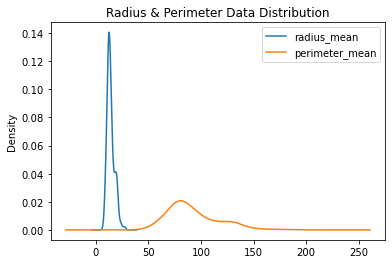

In [14]:
#plot the distribution of points
plt.title("Radius & Perimeter Data Distribution")
df['radius_mean'].plot(kind='kde')
df['perimeter_mean'].plot(kind='kde')
plt.legend()
plt.show()

In [15]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

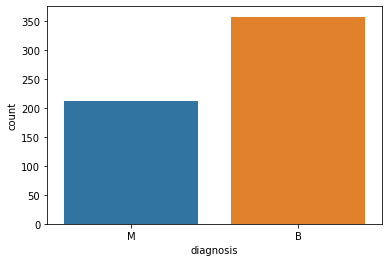

In [16]:
sns.countplot(df['diagnosis'],label='count')

#### Our target varaible have only two class. M and B. Here M and M representes Malignant and Benign respectilvey.

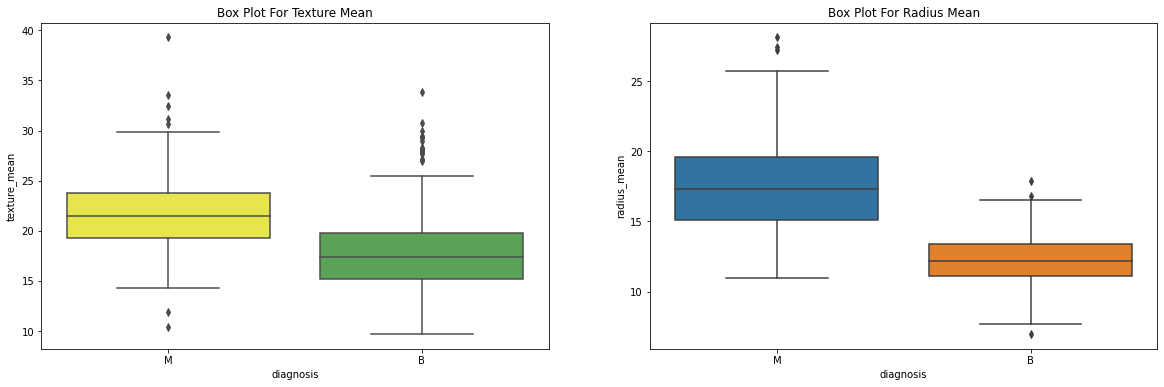

In [17]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Box Plot For Texture Mean")
sns.boxplot(data=df,x="diagnosis",y="texture_mean",palette="Set1_r")

plt.subplot(1,2,2)
plt.title('Box Plot For Radius Mean')
sns.boxplot(data=df,x="diagnosis",y="radius_mean")

plt.show()

#### Inference:

Malignant tumors have larger radius. So we can say, Malignant cancer cells are larger in size than benign cancer cells.

The tissue average of malignant cancer cells is larger.

In [18]:
# Create two new DataFrames based on the diagnosis column
M = df[df["diagnosis"]=="M"] # malignant cases
B = df[df["diagnosis"]=="B"] # benign cases

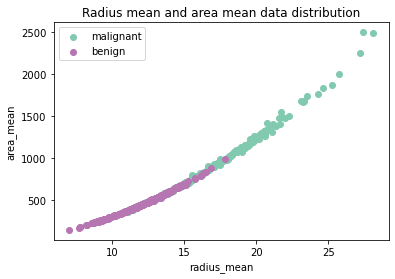

In [19]:
#plotting graph to mark the data distribution of Radius and Area
plt.title("Radius mean and area mean data distribution")
plt.scatter(M.radius_mean,M.area_mean, color = "#82CAAF", label="malignant")
plt.scatter(B.radius_mean,B.area_mean, color = "#B676B1", label="benign")
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.legend()
plt.show()

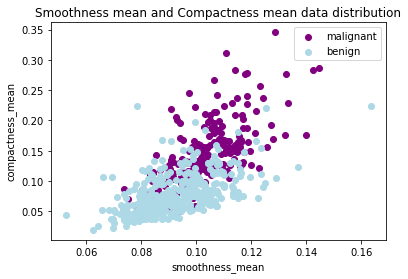

In [20]:
#plotting graph to mark the data distribution of Smoothness and Compactness
plt.title("Smoothness mean and Compactness mean data distribution")
plt.scatter(M.smoothness_mean,M.compactness_mean, color = "#800080", label="malignant")
plt.scatter(B.smoothness_mean,B.compactness_mean, color = "#ADD8E6", label="benign")
plt.xlabel("smoothness_mean")
plt.ylabel("compactness_mean")
plt.legend()
plt.show()

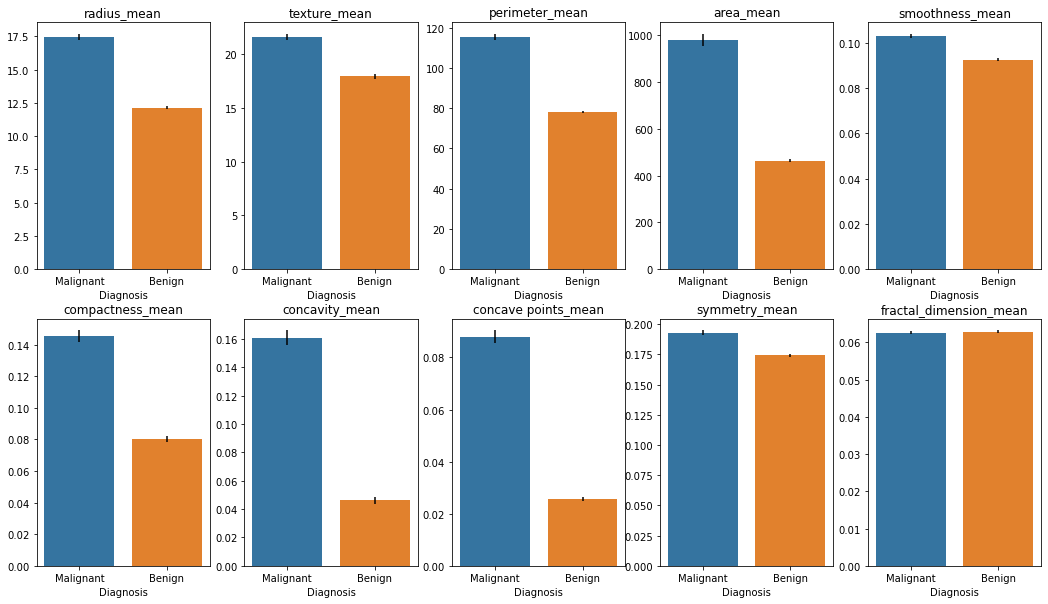

In [21]:
# Bar plot to analyze the data and compare the distribution of malignant and benign tumors 

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

fig, axes = plt.subplots(2, 5, figsize=(18, 10))

for i, feature in enumerate(features[:int(len(features)/2)]):
    ax = axes[0, i]
    ax.bar(['Malignant', 'Benign'], [M[feature].mean(), B[feature].mean()], yerr=[M[feature].sem(), B[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)
    
for i, feature in enumerate(features[int(len(features)/2):]):
    # Create a bar chart for each feature
    ax = axes[1, i]
    ax.bar(['Malignant', 'Benign'], [M[feature].mean(), B[feature].mean()], yerr=[M[feature].sem(), B[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)


# Show the figure
plt.show()

### Label Encodeing

#### Here we Encode M as 1 and B as 0

In [22]:
df['diagnosis'] = df['diagnosis'].map({'B':0 ,'M':1})

In [23]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Finding Relation Between Dependent and Independent Columns

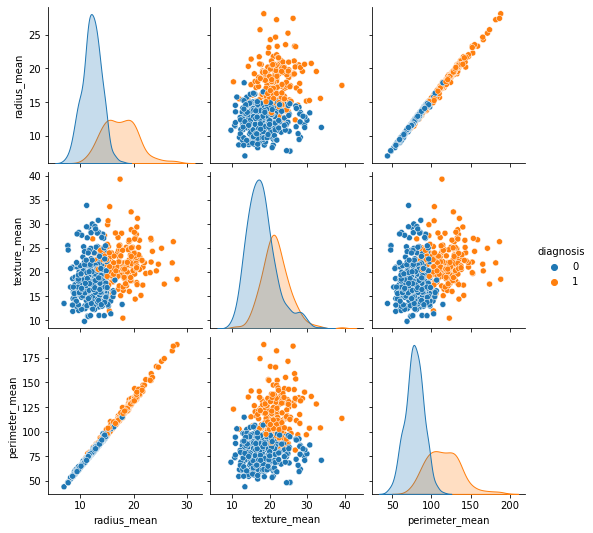

In [24]:
sns.pairplot(df.iloc[:,1:5],hue="diagnosis")

In [25]:
# Get the correlation of the columns
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Data Correlation

<AxesSubplot:>

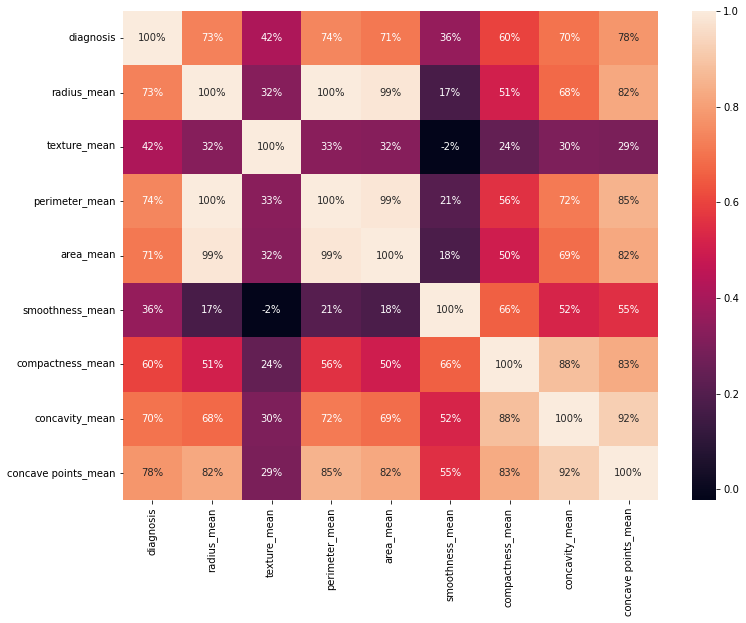

In [26]:
# Visualize the correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.iloc[:,1:10].corr(),annot=True,fmt=".0%")

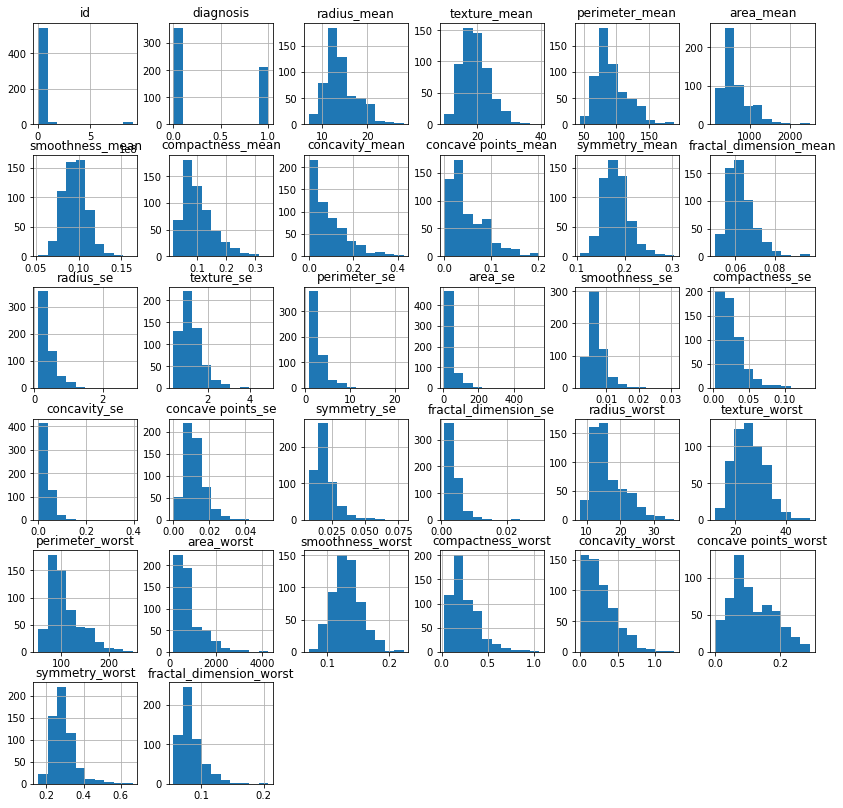

In [27]:
#visualize distribution of the data
df.hist(figsize=(14, 14))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


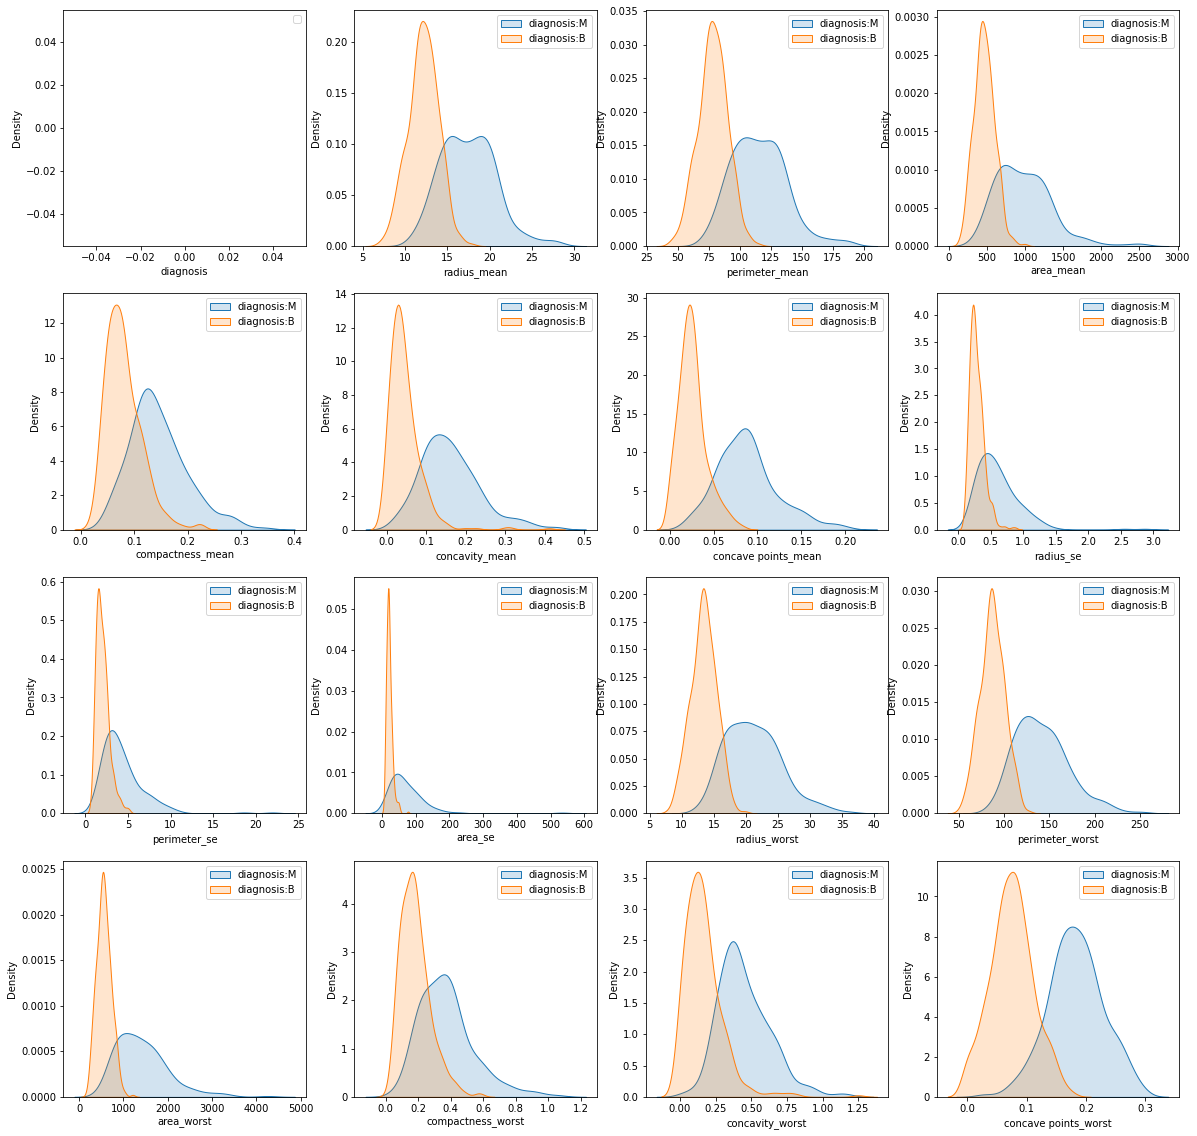

In [28]:
#Simply select the features with a correlation>0.5 with diagnosis
features = list(df.corr()[df.corr()['diagnosis']>0.5].index)
X=df[features]
fig, axes = plt.subplots(4,4,figsize=(20,20))

cnt = 0
for i in range(4):
    for j in range(4):
        feature_element = features[cnt]
        cnt+=1
        plt.sca(axes[i,j])
        sns.kdeplot(df[df.diagnosis==1][feature_element],shade=True,alpha=0.2,legend=True,label='diagnosis:M')
        sns.kdeplot(df[df.diagnosis==0][feature_element],shade=True,alpha=0.2,legend=True,label='diagnosis:B')
        plt.legend()

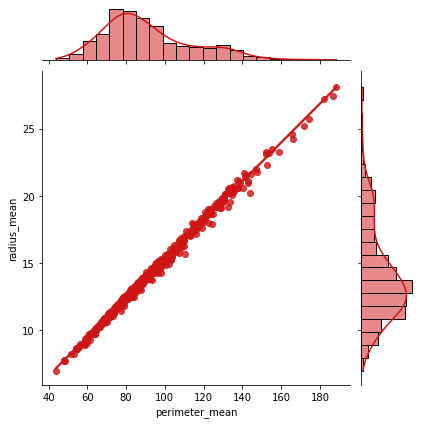

In [29]:
sns.jointplot(X.loc[:,'perimeter_mean'], X.loc[:,'radius_mean'], kind="reg", color="#ce1414")

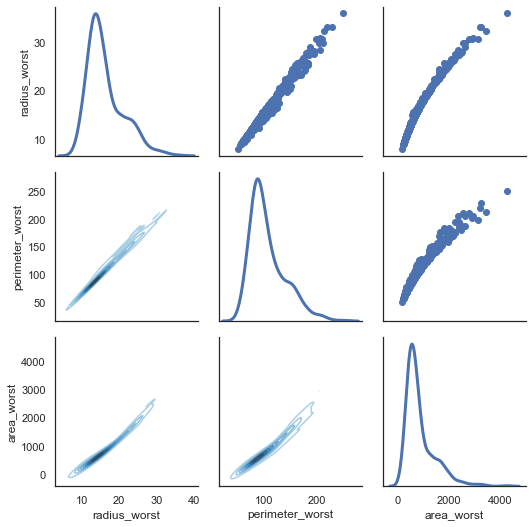

In [30]:
sns.set(style="white")
dfs = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(dfs, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

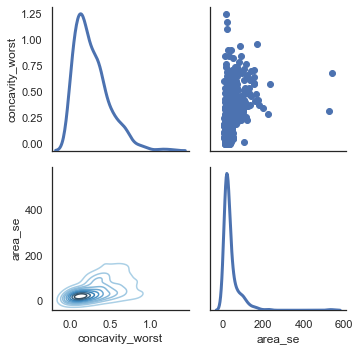

In [31]:
sns.set(style="white")
dft = X.loc[:,['concavity_worst','area_se']]
g = sns.PairGrid(dft, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

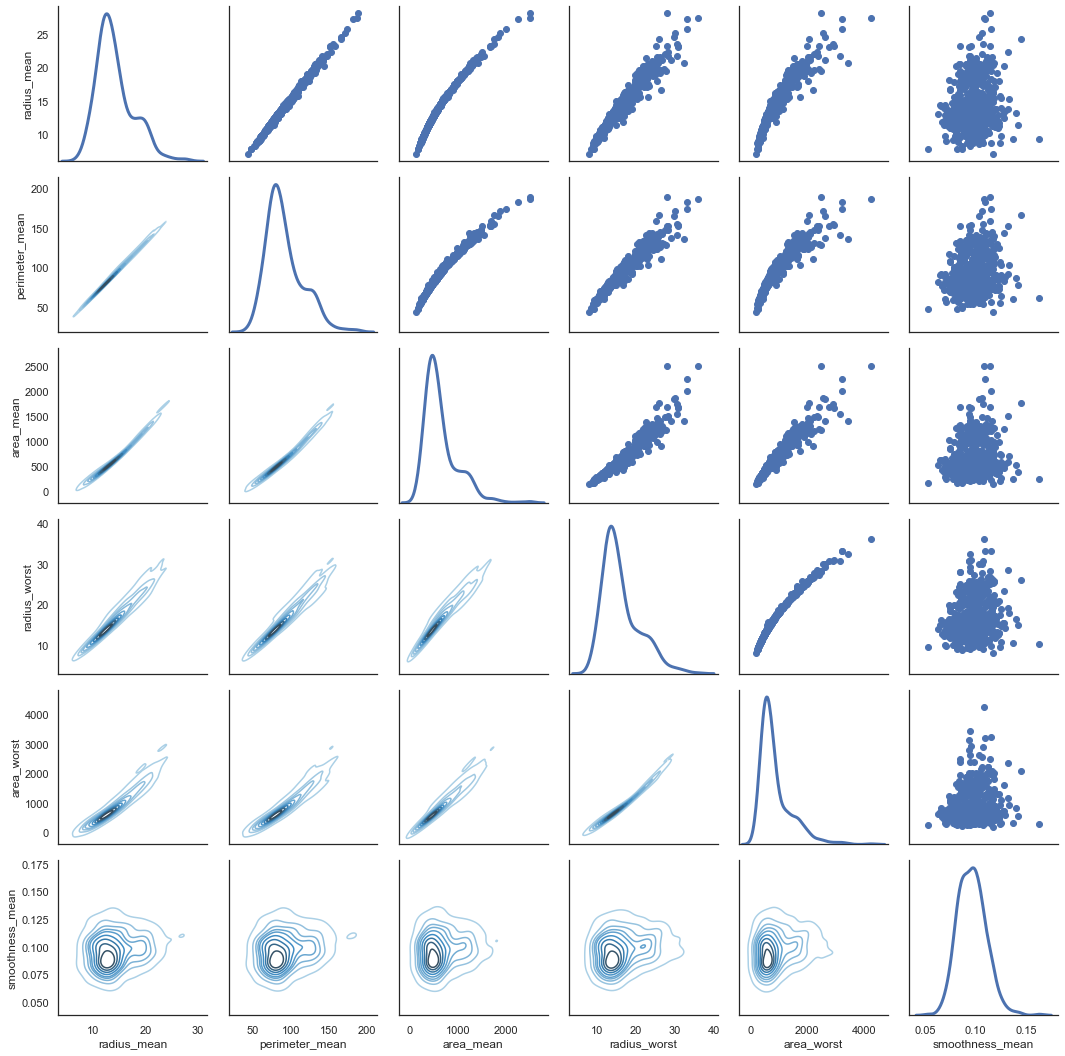

In [32]:
sns.set(style="white")
dfm = df.loc[:,['radius_mean','perimeter_mean','area_mean', 'radius_worst','area_worst','smoothness_mean']]
g = sns.PairGrid(dfm, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# Data Preprocessing and Pipelining

## Split the dataset into independent (X) and dependent (Y)

In [33]:
df.drop('id', axis=1, inplace=True)
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

print(type(X))
print(Y.shape)
X

<class 'pandas.core.frame.DataFrame'>
(569,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Spliting Dataset into training and testing samples

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.16650,0.29420,0.53080,0.21730,0.3032,0.08075
516,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,...,21.86,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863


In [35]:
df.shape

(569, 31)

In [36]:
X_train.shape

(455, 30)

In [37]:
X_test.shape

(114, 30)

In [38]:
Y_train.shape

(455,)

In [39]:
Y_test.shape

(114,)

## Scaling Dataset

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [41]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

## Create a generalized function to calculate the performance metrics for the test set.

In [42]:
def get_test_report(model):
    
    Y_pred = model.predict(X_test)

    return(classification_report(Y_test, Y_pred))

## Define a function to plot the confusion matrix.

In [43]:
def plot_confusion_matrix(model):
    
    Y_pred = model.predict(X_test)
    
    cm = confusion_matrix(Y_test, Y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

## Define a function to plot the ROC curve.

In [44]:
def plot_roc(model):
    
    Y_pred_prob = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')


    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(Y_test, Y_pred_prob),4)))

    plt.grid(True)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Machine Learning Algorithm

## Logistic Regression

In [46]:
log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [47]:
Y_pred=log.predict(X_test)

In [48]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [49]:
Y_test

512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: int64

In [50]:
print("Training accuracy :", log.score(X_train, Y_train))
print("Testing accuarcy :", log.score(X_test, Y_test))

Training accuracy : 0.989010989010989
Testing accuarcy : 0.956140350877193


In [51]:
lr_acc=accuracy_score(Y_test,Y_pred)

In [52]:
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of Logistic Regression model is 95.6140350877193


In [53]:
lr_model=log.fit(X_train,Y_train)

In [54]:
#confusion matrix

lr_cm = confusion_matrix(Y_test, Y_pred)
print(lr_cm)

[[65  2]
 [ 3 44]]


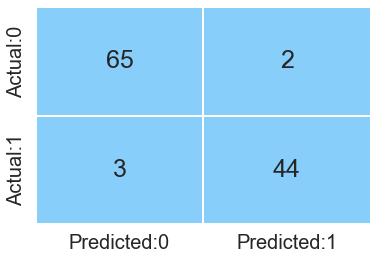

In [55]:
plot_confusion_matrix(lr_model)

In [56]:
print("Classification Report")
test_report = get_test_report(lr_model)

print(test_report)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



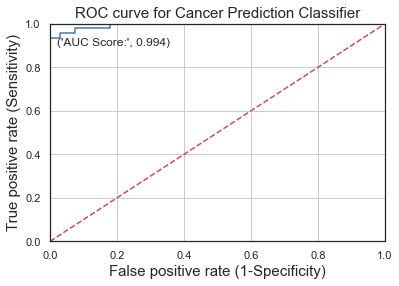

In [57]:
plot_roc(lr_model)

In [58]:
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)

In [59]:
result = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.95614,0.946237,0.956522,0.93617


In [60]:
#cross-validation

acc= cross_val_score(estimator=log, X=X_train, y=Y_train, cv=10)
print("Accuracy is {:.2f}%.".format(acc.mean()*100))
print("Standard Deviation is {:.2f}%.".format(acc.std()*100))

Accuracy is 97.81%.
Standard Deviation is 1.98%.


## Decision Tree Classifier 

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc=DecisionTreeClassifier(random_state=0,criterion="entropy")
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
Y_pred=dtc.predict(X_test)

In [64]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [65]:
print("Training accuracy :", dtc.score(X_train, Y_train))
print("Testing accuarcy :", dtc.score(X_test, Y_test))

Training accuracy : 1.0
Testing accuarcy : 0.9385964912280702


In [66]:
dtc_acc=accuracy_score(Y_test,Y_pred)

In [67]:
print('Accuracy of Decision Tree Classifier model is {}'.format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of Decision Tree Classifier model is 93.85964912280701


In [68]:
dtc_model=dtc.fit(X_train,Y_train)

In [69]:
#confusion matrix

dtc_cm = confusion_matrix(Y_test, Y_pred)
print(dtc_cm)

[[64  3]
 [ 4 43]]


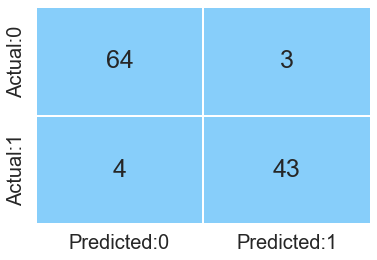

In [70]:
plot_confusion_matrix(dtc_model)

In [71]:
print("Classification Report")
test_report = get_test_report(dtc_model)

print(test_report)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



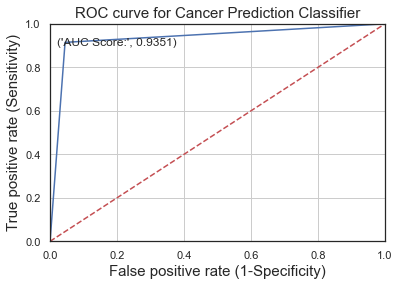

In [72]:
plot_roc(dtc_model)

In [73]:
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)

In [74]:
result_1 = pd.DataFrame([['Decision Tree Classifier', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
result_1

,Model,Accuracy,F1 Score,Precision,Recall
0,Decision Tree Classifier,0.938596,0.924731,0.934783,0.914894


In [75]:
result = result.append(result_1, ignore_index=True)
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,Decision Tree Classifier,0.938596,0.924731,0.934783,0.914894


In [76]:
#cross-validation

acc= cross_val_score(estimator=dtc, X=X_train, y=Y_train, cv=10)
print("Accuracy is {:.2f}%.".format(acc.mean()*100))
print("Standard Deviation is {:.2f}%.".format(acc.std()*100))

Accuracy is 91.88%.
Standard Deviation is 3.06%.


## Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [79]:
Y_pred=rf.predict(X_test)

In [80]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [81]:
print("Training accuracy :", rf.score(X_train, Y_train))
print("Testing accuarcy :", rf.score(X_test, Y_test))

Training accuracy : 0.9978021978021978
Testing accuarcy : 0.9736842105263158


In [82]:
rf_acc=accuracy_score(Y_test,Y_pred)

In [83]:
print('Accuracy of Random Forest Classifier model is {}'.format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of Random Forest Classifier model is 97.36842105263158


In [84]:
rf_model=rf.fit(X_train,Y_train)

In [85]:
#confusion matrix

rf_cm = confusion_matrix(Y_test, Y_pred)
print(rf_cm)

[[66  1]
 [ 2 45]]


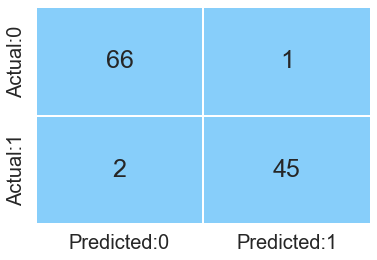

In [86]:
plot_confusion_matrix(rf_model)

In [87]:
print("Classification Report")
test_report = get_test_report(rf_model)

print(test_report)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



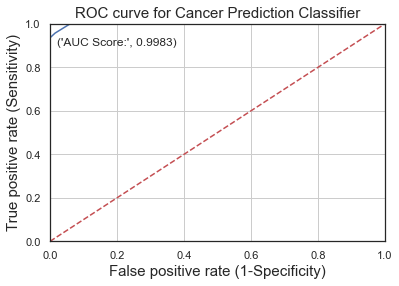

In [88]:
plot_roc(rf_model)

In [89]:
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)

In [90]:
result_2 = pd.DataFrame([['Random Forest Classifier', acc, f1, prec, rec]], columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
result_2

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest Classifier,0.973684,0.967742,0.978261,0.957447


In [91]:
result = result.append(result_2, ignore_index=True)
result

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,Decision Tree Classifier,0.938596,0.924731,0.934783,0.914894
2,Random Forest Classifier,0.973684,0.967742,0.978261,0.957447


In [92]:
#cross-validation

acc= cross_val_score(estimator=rf, X=X_train, y=Y_train, cv=10)
print("Accuracy is {:.2f}%.".format(acc.mean()*100))
print("Standard Deviation is {:.2f}%.".format(acc.std()*100))

Accuracy is 96.27%.
Standard Deviation is 2.62%.


## Comparison of Algorithm Accuracies

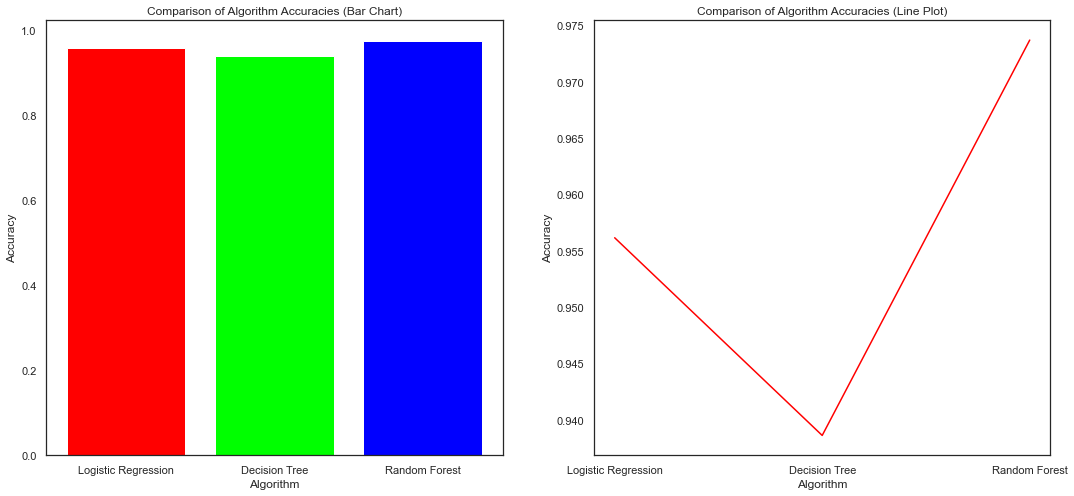

In [93]:
algorithms = ["Logistic Regression", "Decision Tree", "Random Forest"]


accuracies = [lr_acc,dtc_acc,rf_acc]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

colors = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]
for i, algo in enumerate(algorithms):
    ax1.bar(algo, accuracies[i], color=colors[i])


ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Accuracy")
ax1.set_title("Comparison of Algorithm Accuracies (Bar Chart)")

ax2.plot(algorithms, accuracies, color='#ff0000')

ax2.set_xlabel("Algorithm")
ax2.set_ylabel("Accuracy")
ax2.set_title("Comparison of Algorithm Accuracies (Line Plot)")

plt.show()